

# Project: The Movie Database (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Movie Database (TMDb) had a dataset which contains information about 10,000+ movies including user ratings, budgets and revenues.
I want to explore, find and share answers for many questions as below:
    
    1- Which year has the highest & the lowest revenue?
    2- Which year has the highest release of movies?
    3- Which genre has the highest release of movies?
    4- Which movie get the highest & the lowest votes?
    5- Which movie has the highest budget?
    6- What are the top 10 movies with the highest budget? 
    7- Which movie has shortest and longest runtime?
    8- Which genres are most popular from year to year?
    9- How does the profit depend on the genre of the movie?
    10- Which movie has the highest profit?
    11- What are the top 10 movies which earn highest profit? 
    12- How does the budget affect the profit of the movie?
    13- What are the company production with the highest number of release?
    14- Who are the top ten directors?
  


In [52]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [53]:

#print first five rows of the dataset

df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# print the last five rows of dataset.
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
# print all columns names.
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# print number of rows & columns.
df.shape


(10866, 21)

In [6]:
# print a concise summery of the dataset.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# find any duplicates within the dataset.
sum(df.duplicated())


1

In [8]:
# find statistics summery of the dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#the dataset contains null values.
#count total rows in each column which contain null values.
df.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

# Observations from the dataset:

1- The dataset contains one duplicated row.                             
2- The dataset contains unnecessary columns that will not be used in our analysis.                         
3- The dataset contains a lot of movies with Zero value in columns of budget & revenue.                    
4- The dataset contains null of values in different rows.                                                                    
              



### Data Cleaning

# Observations that need to be modified or removed:
    
1- Removing the duplicated row from the dataset.             
2- Removing the unnecessary columns.                
3- Removing the movies which are having zero value of budget and revenue.                       
4- Filling in the null values.                                                        




In [10]:
# remove duplicated row
df.drop_duplicates(inplace = True)

In [11]:
# recheck & confirm that the duplicates removed
sum(df.duplicated())

0

In [12]:
df.shape

(10865, 21)

In [13]:
# remove the unnecessary columns.

del_columns = ['id','imdb_id', 'budget', 'revenue','homepage','tagline', 'keywords', 'overview', 'release_date', 'vote_average']

# budget_adj and revenue_adj will be used instead of budget and revenue to include inflation over time
df.drop(del_columns, axis= 1, inplace = True)
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,1.747999e+08,1.385749e+09


In [14]:
#check the number of rows & columns
df.shape


(10865, 11)

In [15]:
#fill in the null values 
df.fillna(0)


,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,1.747999e+08,1.385749e+09
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,2015,1.241999e+08,4.903142e+08
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,2015,1.425999e+08,4.053551e+08
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,2015,9.935996e+07,5.477497e+08
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,2015,6.807997e+07,1.064192e+09
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,2015,1.609999e+08,7.854116e+08


In [16]:
#count total rows in each column which contain null values.
df.isnull().sum()


popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
# remove the movies which are having zero value of budget, revenue & runtime.
df["budget_adj"].replace(0, np.NaN, inplace = True)
df["revenue_adj"].replace(0, np.NaN, inplace = True)
df["runtime"].replace(0, np.NaN, inplace = True)


In [18]:
#drop rows with NaN values
df.dropna(inplace = True)
df.shape


(3805, 11)

In [19]:
#check the type of each column
df.dtypes


popularity              float64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
vote_count                int64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [20]:
#changes the data type of columns from float to int
change_coltype = ['budget_adj', 'revenue_adj', 'runtime']

df[change_coltype] = df[change_coltype].applymap(np.int64)


In [21]:
#recheck the data types of all columns
df.dtypes


popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
release_year              int64
budget_adj                int64
revenue_adj               int64
dtype: object

In [22]:
#create a column for profit
df["profit"] = df["revenue_adj"] - df["budget_adj"]
df.head()


,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,137999939,1392445892,1254445953
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,137999939,348161292,210161353
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,101199955,271619025,170419070
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,183999919,1902723129,1718723210
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,174799923,1385748801,1210948878


<a id='eda'></a>
## Exploratory Data Analysis





#  Question 1: Which year has the highest & lowest revenue?

In [23]:
#define a function to calculates the lowest and highest values of each column
def highest_lowest(column_name):
    
    highest_value = df[column_name].idxmax()
    highest_data = pd.DataFrame(df.loc[highest_value])

    lowest_value = df[column_name].idxmin()
    lowest_data = pd.DataFrame(df.loc[lowest_value])    
    highest_lowest_values = pd.concat([highest_data, lowest_data],axis=1)
    
    return(highest_lowest_values)


In [24]:
highest_lowest('revenue_adj')

,1386,5067
popularity,9.43277,0.462609
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
vote_count,8458,46
release_year,2009,2003
budget_adj,240886902,7112115


As the above data, the highest revenue is 2,827,123,750 US Dollar for "Avatar" directed by James Cameron on 2009.The lowest revenue is 2 for "Shattered Glass" which is not logic but may be it was written by mistake on the dataset.

# Question 2: Which year has the highest release of movies?

In [25]:
#make a group for each year and count the number of movies in each one 
movies_per_year=df.groupby('release_year').count()['original_title']
print(movies_per_year.head())



release_year
1960     5
1961    10
1962     7
1963     6
1964     7
Name: original_title, dtype: int64


In [26]:
#check the last five rows
print(movies_per_year.tail())


release_year
2011    196
2012    157
2013    179
2014    165
2015    160
Name: original_title, dtype: int64


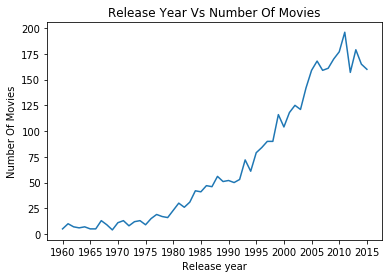

In [27]:
#plot the number of movies that released each year.
movies_per_year.plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Release Year Vs Number Of Movies",fontsize = 12)
plt.xlabel('Release year',fontsize = 10)
plt.ylabel('Number Of Movies',fontsize = 10)
sns.set_style("dark")


According to the figure and the data above, we can conclude that the last 10 years had a great increment in the cinema industry as the number of movies released is increased compared to the released movies on 60's, 70's and 90's.
The highest number of released movies are 196 movie on the year 2011.


# Question 3: Which genre has the highest release of movies?

In [28]:
#make a function that split the string of the genres column and return the count of each genres.

def count_genres(x):
    #concatenate all the rows of the genres.
    genres_data = df[x].str.cat(sep = '|')
    movies_per_year = pd.Series(genres_data.split('|'))
    #count each of the genres and return it.
    genres_info = movies_per_year.value_counts(ascending=False)
    return genres_info

#call the function for counting the movies of each genre.
total_genres_movies = count_genres('genres')


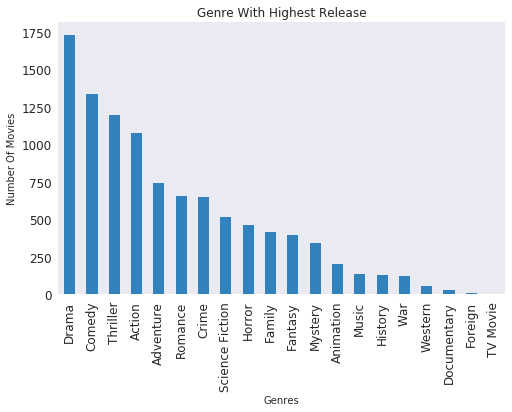

In [29]:
#plot the genres and number of movies.
total_genres_movies.plot(kind= 'bar',figsize = (8,5),fontsize=12,colormap='tab20c')
plt.title("Genre With Highest Release",fontsize=12)
plt.xlabel('Genres',fontsize=10)
plt.ylabel("Number Of Movies",fontsize= 10)
sns.set_style("darkgrid")


As per the above figure, the most popular genre is Drama, followed by Comedy and Thriller.

# Question 4: Which movie get the highest & the lowest votes?

In [30]:
highest_lowest('vote_count')

,1919,1818
popularity,9.36364,0.159638
original_title,Inception,Beautiful
cast,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Deborra-Lee Furness|Peta Wilson|Aaron Jeffery|...
director,Christopher Nolan,Dean O'Flaherty
runtime,148,97
genres,Action|Thriller|Science Fiction|Mystery|Adventure,Drama|Mystery|Thriller
production_companies,Legendary Pictures|Warner Bros.|Syncopy,Kojo Pictures
vote_count,9767,10
release_year,2010,2009
budget_adj,160000000,1524600


As we can see that "Inception" has the maximum number of votes, which was casted by Leonardo DiCaprio and the movie with lowest votes is "Beautiful" which was casted by Deborra-Lee Furness.

# Question 5: Which movie has the highest budget?

In [31]:
highest_lowest('budget_adj')

,2244,3581
popularity,0.25054,0.52043
original_title,The Warrior's Way,"Love, Wedding, Marriage"
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...
director,Sngmoo Lee,Dermot Mulroney
runtime,100,90
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,120dB Films|Scion Films|Voodoo Production Serv...
vote_count,74,55
release_year,2010,2011
budget_adj,425000000,0


As the above table, the highest budget is 425,000,000 US Dollar for "The Warrior's Way" directed by Sngmoo Lee and released on 2010.

# Question 6: What are the top 10 movies with the highest budget? 

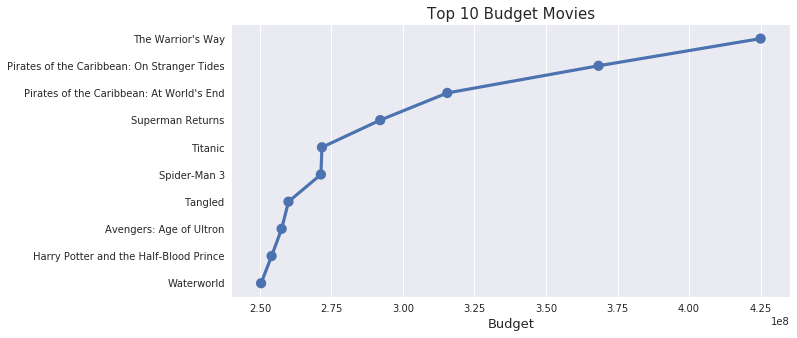

In [32]:
#make a plot which contain top 10 movies with the highest budget.
#sort the 'budget_adj' column in descending order and store it in the new dataframe,
top_ten_budget = pd.DataFrame(df['budget_adj'].sort_values(ascending = False))
top_ten_budget['original_title'] = df['original_title']
movies_per_year = list(map(str,(top_ten_budget['original_title'])))
x = list(movies_per_year[:10])
y = list(top_ten_budget['budget_adj'][:10])

ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")


The highest budget movie is "The Warrior's Way" & the lowest one is "Water World". 

# Question 7: Which movie has shortest and longest runtime?



In [33]:
highest_lowest('runtime')

,2107,5162
popularity,0.534192,0.208637
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C
vote_count,35,16
release_year,2010,2003
budget_adj,18000000,11


As mentioned on the above data, the longest runtime is 338 min for "Carlos", it's a TV Mini-Series not a movie that is way it's long around (5 hours 63 min). On the other hand, the shortest runtime is 15 min for the short movie "kid's story" casted by Keanu Reeves & Clayton Watson.

# Question 8: Which genres are most popular from year to year?

In [34]:
#check the most popular movies genres over years
popular_genres = df[["release_year", "genres"]].sort_values(["release_year","genres"], ascending = False)
popular_genres_per_year = pd.DataFrame(popular_genres.groupby(["release_year"]).genres.max())
popular_genres_per_year.tail(11)


,genres
release_year,
2005,Thriller|Science Fiction|Adventure|Action
2006,Western|Drama
2007,Western
2008,War|Drama
2009,Thriller|Science Fiction
2010,Thriller|Mystery
2011,War|Drama
2012,War|Action|Thriller|Science Fiction
2013,Western|Thriller


According to the above table, the most popular genre is Thriller for the last 10 years start from 2005 to 2015.

# Question 9: How does the profit depend on the genre of the movie?

In [36]:
#divide budget_adj, revenue_adj, profit columns by 1000000 to get values in Million USD

df["budget_adj"] = df["budget_adj"]/1000000
df["revenue_adj"] = df["revenue_adj"]/1000000
df["profit"] = df["profit"]/1000000
df.head()


,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,137.999939,1392.445892,1254.445953
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,137.999939,348.161292,210.161353
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,101.199955,271.619025,170.419070
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,183.999919,1902.723129,1718.723210
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,174.799923,1385.748801,1210.948878


In [37]:
#check profit of movies genres

profit_genres = df[["profit", "genres"]].sort_values(["profit","genres"], ascending = False)
profit_per_genres = pd.DataFrame(profit_genres.groupby(["profit"]).genres.max())
profit_per_genres.tail(10)


,genres
profit,
1376.997526,Adventure|Action|Science Fiction
1545.635295,Adventure|Animation|Comedy|Family
1551.568265,Crime|Drama|Mystery|Thriller|Action
1718.723210,Action|Adventure|Science Fiction|Fantasy
1767.968064,Science Fiction|Adventure|Family|Fantasy
1878.643093,Horror|Thriller|Adventure
2128.035625,Drama|Horror|Thriller
2234.713671,Drama|Romance|Thriller
2586.236848,Action|Adventure|Fantasy|Science Fiction


As per the above table, the highest profitable movies are the adventure movies. it gained the highest profit all over the genres.

# Question 10: Which movie has the highest profit?

In [38]:
highest_lowest('profit')

,1329,2244
popularity,12.0379,0.25054
original_title,Star Wars,The Warrior's Way
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,George Lucas,Sngmoo Lee
runtime,121,100
genres,Adventure|Action|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation,Boram Entertainment Inc.
vote_count,4428,74
release_year,1977,2010
budget_adj,39.5756,425


According to the above table, the highest profit was for "Star Wars" and the lowest profit for "The Warrior's Way".

# Question 11: What are the top 10 movies which earn highest profit? 

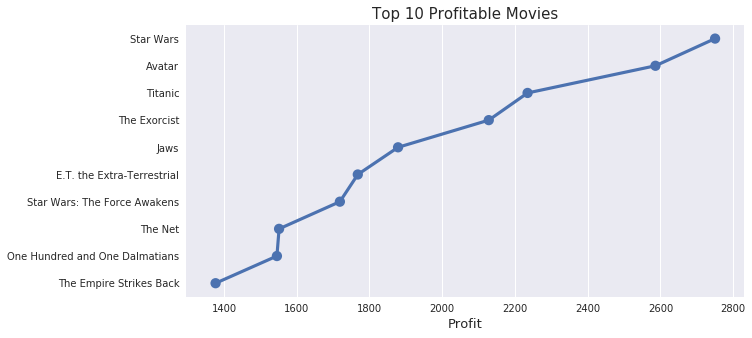

In [39]:
#make a plot which contain top 10 movies which earn highest profit.
#sort the 'profit' column in descending order and store it in the new dataframe,
top_ten_movies = pd.DataFrame(df['profit'].sort_values(ascending = False))
top_ten_movies['original_title'] = df['original_title']
movies_per_year = list(map(str,(top_ten_movies['original_title'])))
x = list(movies_per_year[:10])
y = list(top_ten_movies['profit'][:10])
#make a plot using pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 13)
sns.set_style("darkgrid")


As per the figure above we can find the top 10 profitable movies over the years. The highest profitable movie is "Star Wars" and the lowest profitable movie is "The Empire Strikes Back".

# Question 12: How does the budget affect the profit of the movie?

In [40]:
#check profit vs budget of each movie

profit_budget = df[["profit", "budget_adj"]].sort_values(["profit","budget_adj"], ascending = False)
profit_vs_budget = pd.DataFrame(profit_budget.groupby(["profit"]).budget_adj.max())
profit_vs_budget.tail(10)


,budget_adj
profit,
1376.997526,47.628661
1545.635295,29.179444
1551.568265,31.481271
1718.723210,183.999919
1767.968064,23.726245
1878.643093,28.362748
2128.035625,39.289276
2234.713671,271.692064
2586.236848,240.886902


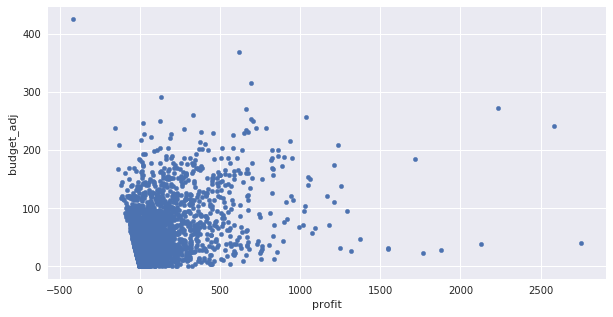

In [41]:
#make a plot of profit & budget
df.plot(x='profit', y='budget_adj', kind='scatter')


As we can see from the figure and the table above, Profit and Budget both have positive correlation between them which means there is a good possibility that the movies with higher investments result in a higher profit.

# Question 13: What are the production company with the highest number of release?

In [42]:
#call the 'count_genres' function which we made earlier
#it will count number of movies released by each production company.
production_companies = count_genres('production_companies')



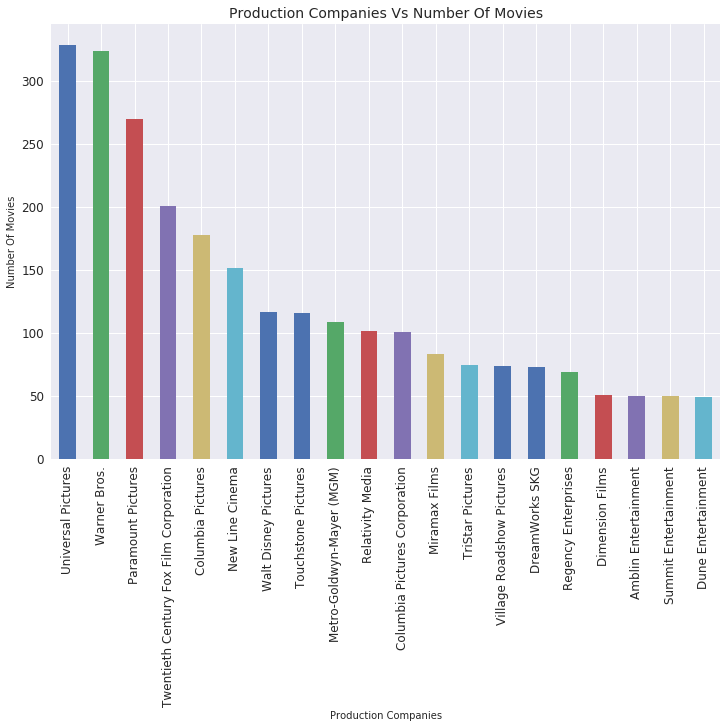

In [43]:
#plot the bar plot.
production_companies.iloc[:20].plot(kind='bar',figsize=(12,8),fontsize=12)
plt.title("Production Companies Vs Number Of Movies",fontsize=14)
plt.xlabel('Production Companies',fontsize=10)
plt.ylabel('Number Of Movies',fontsize=10)
sns.set_style("whitegrid")


As above figure, "Universal Pictures" is the most popular production company that released the highest number of movies around 300 movies, followed by "Warner Bros.".

# Question 14: Who are the top ten directors?

In [44]:
#call the 'count_genres' function which we made earlier
#it will count number of movies released by each director.
top_ten_directors = count_genres('director')


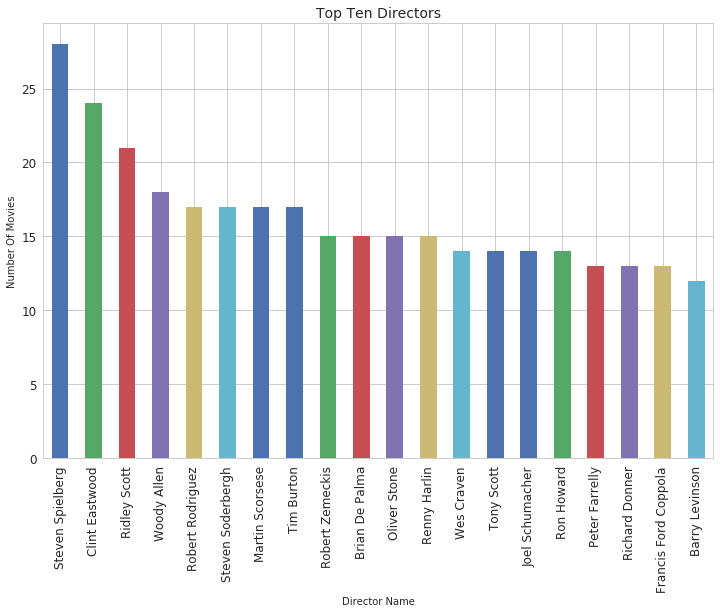

In [45]:
#plot the bar plot.
top_ten_directors.iloc[:20].plot(kind='bar',figsize=(12,8),fontsize=12)
plt.title("Top Ten Directors",fontsize=14)
plt.xlabel('Director Name',fontsize=10)
plt.ylabel('Number Of Movies',fontsize=10)
sns.set_style("whitegrid")

As per the graph above, we can see that the top director is "Steven Spielberg" followed by "Clint Eastwood" and "Ridley Scott".

# Conclusions



* The Highest revenue_adj is "Avatar" movie and the lowest revenue_adj is "Shattered Glass" movie.
* Maximum number of movies released were in the year 2011.
* Drama is the most popular genre followed by comedy and thriller.
* The highest profit is "Star Wars" movie and the lowest profit is "The Warrior's Way" movie.
* The longest runtime is "Carlos" movie and the shortest runtime is "Kid's Story" movie.
* "Avatar", "Star Wars" and "Titanic" are the most profitable movies.
* Movies with higher budgets have shown a corresponding increase in the profit.
* Universal Pictures, Warner Bros, and Paramount Pictures are the most production companies that released movies.
* The top director is "Steven Spielberg" followed by "Clint Eastwood" and "Ridley Scott".


# Limitations

* The dataset contains a huge amount of 0 and NaN values; which forced us to remove around 6000 movies, which can mislead final results.
* We use (budget_adj, revenue_adj) columns to account for inflation over time, if (budget, revenue) columns are used different results will appear.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])